In [1]:
%pip install cvxpy

In [2]:
import cvxpy as cp
import numpy as np

# Problem 1
(Constrained least-squares) In this problem we are going to find the minimum of a bowl shape function and visualize the result in 3D. The function $f(x): \mathbb{R}^2 \rightarrow \mathbb{R}$ and it is defined to be $f(x) = |Ax - b|_2$. We are looking for a solution in $[0, 1]$.

## Solution

In [63]:
np.random.seed(1)
m = 20
n = 2
A = np.random.randn(m, n)
b = np.random.randn(m, 1)
sign = 1

# Define the variable
x = cp.Variable(n)

# Define the objective function
objective = cp.Minimize(sign * cp.norm(cp.reshape(A @ x, (m, 1)) - b, 2))

# Define the constraints
constraints = [
    x <= 1,
    -x <= 0
]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()
x.value

array([0.15634013, 0.14663534])

## Visualization

Optimal value of x: [0.15634013 0.14663534]


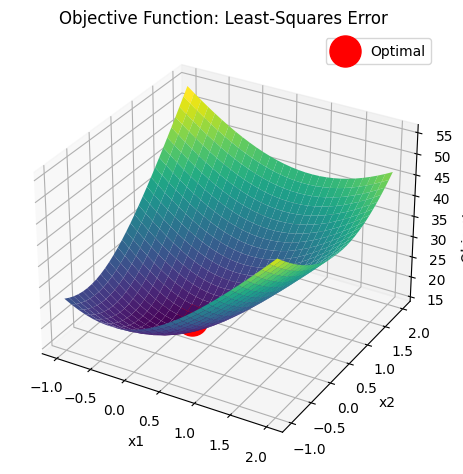

In [87]:
import numpy as np
import matplotlib.pyplot as plt

print("Optimal value of x:", x.value)

# Create grid and compute objective values
x1, x2 = np.meshgrid(np.linspace(-1, 2, 30), np.linspace(-1, 2, 30))
grid = np.column_stack((x1.ravel(), x2.ravel()))

# Ensure we're only using the first two dimensions
def objective(x):
    return sign * np.linalg.norm(A @ x - b)

potential_values = np.array([objective(x) for x in grid])

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, potential_values.reshape(x1.shape), cmap='viridis')
ax.set(xlabel='x1', ylabel='x2', zlabel='Objective Value', title='Objective Function: Least-Squares Error')

# Plot optimal point and boundaries
ax.scatter(*x.value, objective(x.value), color='red', s=500, label='Optimal')

ax.legend()
plt.tight_layout()
plt.show()

# Problem 2

In [88]:
x = cp.Variable(2)

# Define the logarithmic objective
objective = cp.Minimize(cp.log_sum_exp(x))

# Define constraints: 0 <= x <= 1
constraints = [0 <= x, x <= 1]

# Define and solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Print results
print("Optimal value:", problem.value)
print("Optimal x:", x.value)

Optimal value: 0.69314718147633
Optimal x: [9.16421122e-10 9.16348361e-10]


Optimal value of x: [9.16421122e-10 9.16348361e-10]


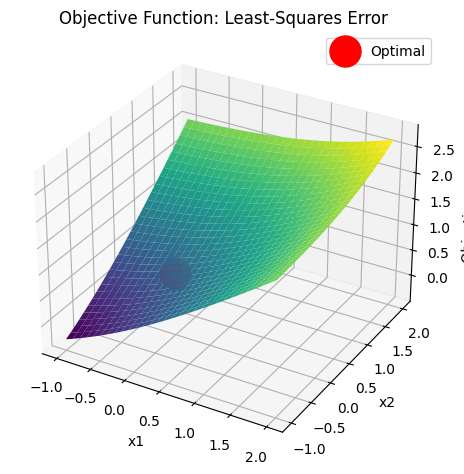

In [89]:
import numpy as np
import matplotlib.pyplot as plt

print("Optimal value of x:", x.value)

# Create grid and compute objective values
x1, x2 = np.meshgrid(np.linspace(-1, 2, 30), np.linspace(-1, 2, 30))
grid = np.column_stack((x1.ravel(), x2.ravel()))

# Ensure we're only using the first two dimensions
def objective(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

potential_values = np.array([objective(x) for x in grid])

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, potential_values.reshape(x1.shape), cmap='viridis')
ax.set(xlabel='x1', ylabel='x2', zlabel='Objective Value', title='Objective Function: Least-Squares Error')

# Plot optimal point and boundaries
ax.scatter(*x.value, objective(x.value), color='red', s=500, label='Optimal')

ax.legend()
plt.tight_layout()
plt.show()